# DATA CLEANING AND FEATURE ENGINEERING

Let's review our objectives.

## Objectives:

* Check the dataset for missing data and placeholders.
* Determine if data transformation is needed.
* Creating new columns via feature engineering.
* Drop unrelavent columns.

## IMPORT DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)});

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('//Users/ulku/Data Science 2.1 /Module_3/dsc-mod-3-project-v2-1-online-ds-sp-000-master/CSV_Files/customer_churn_data.csv')
print('DataFrame Shape:', df.shape)
df.head(10)

DataFrame Shape: (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


Let's convert the column names more python friendly.

In [3]:
df.columns = df.columns.map(lambda col: col.replace(' ','_'))

Let's check out data types for each column, null values and placeholders.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

Our dataset has no null values. Let's check for placeholders and value counts for each column.

In [5]:
for col in df.columns:
    print('Column Name:', col,'\n')
    print(df[col].value_counts())
    print('-------------------------------------------------------')
    print('\n')

Column Name: state 

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
VA     77
WY     77
CT     74
VT     73
MI     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
WA     66
NV     66
CO     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
-------------------------------------------------------


Column Name: account_length 

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account_length, Length: 212, dtype: int64
-------------------------------------------------------


Column Name: area_code 

415    1655
510     840
408     838
Name: area_code, dtype: int64
------------------------------------------------

#### *Notes:*
Our dataset doesn't suffer from missing data or placeholders. We will continue transforming object type columns into binary(numeric) type and creating meaningful columns.

__state:__ Name of the states. We will merge our dataset with 2019 population percentage by state dataset to create a percentage of customers by state column to show what this customer represents regarding the whole population. This data is collected from www.census.gov.

__account_length:__ Number of days a customer has been with the company.

__area_code:__ Area code is a numerical column. It is represented by 3 different 3-digit-number. We will save this column as object data type.

__phone_number:__ It has 3333 unique values, no duplicates. It represents phone numbers after the area code. We will drop it.

__international_plan:__ A 'yes - no' column that we will convert to binary.

__voice_mail_plan:__ Another 'yes - no' column that we will convert to binary.

__customer_service_calls:__ The number of the customer service calls made.

__churn:__ A Boolean column that we will transform into binary.

__total_charge:__ This columns will be a sum of all charges columns.

__total_calls:__ Number of total calls including day, evening, night, and international calls.

__total_minutes:__ Sum of all the minutes used by the customer.

## DATA TRANSFORMATION

###  state

Let's check how state column is distributed.

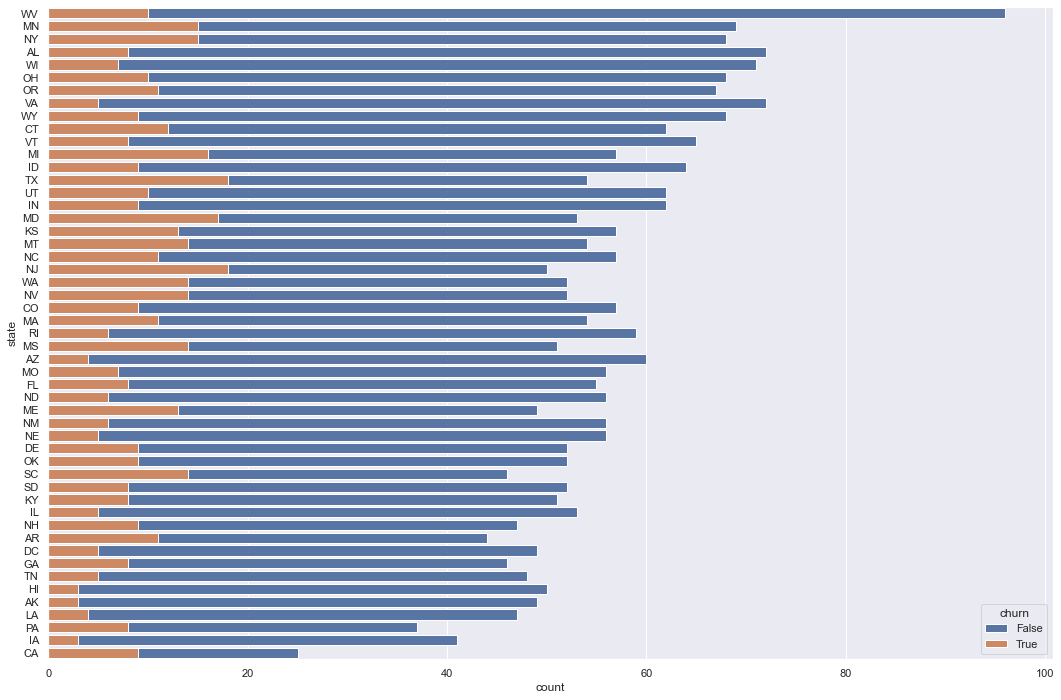

In [6]:
plt.figure(figsize=(18,12))
sns.countplot(y='state', 
              hue= 'churn',  
              order = df['state'].value_counts().index, 
              dodge=False, 
              data=df);

In [7]:
df_pop = pd.read_csv('//Users/ulku/Data Science 2.1 /Module_3/dsc-mod-3-project-v2-1-online-ds-sp-000-master/CSV_Files/population.csv', delimiter= '\t' ).drop(['0', 'population'], axis=1)
df_pop.head()

,state,percentage
0,CA,11.91
1,TX,8.74
2,FL,6.47
3,NY,5.86
4,IL,3.86


In [8]:
df = pd.merge(left=df, right=df_pop, left_on='state', right_on='state', how='left')

In [9]:
df['customer_percentage_by_state'] = np.nan

for i in range(len(df)):
    for state_name in df.state.unique():
        df['customer_percentage_by_state'][i] = round((len(df[df['state'] == state_name]) * df['percentage'][i]) / len(df), 3)

In [10]:
df.drop('percentage', axis=1,inplace=True)

### area_code

In [13]:
df['area_code'] = df['area_code'].astype('object')

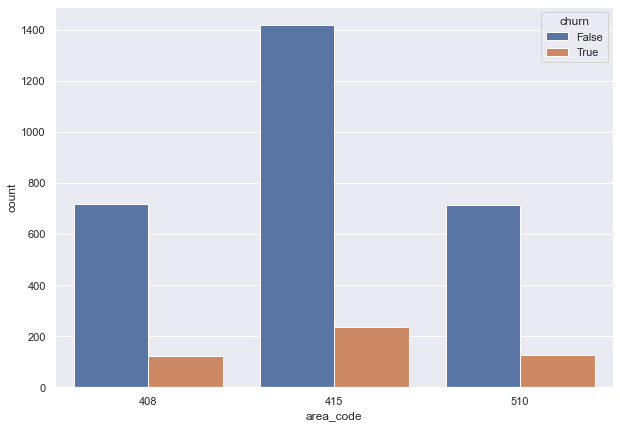

In [14]:
sns.countplot(x='area_code', hue='churn', data=df);

### phone_number

In [15]:
df['phone_number'].nunique()

3333

In [16]:
df.drop('phone_number', axis=1, inplace=True)

### international_plan

In [17]:
df['international_plan'] = df['international_plan'].map({'no': 0, 'yes': 1})

### voice_mail_plan

In [18]:
df['voice_mail_plan'] = df['voice_mail_plan'].map({'no': 0, 'yes': 1})

### churn

In [19]:
df['churn'] = df['churn'].map({False: 0, True: 1})

In [20]:
round(df['churn'].value_counts(normalize=True)*100,2)

0    85.51
1    14.49
Name: churn, dtype: float64

Only 14.49% of the customers ended their contract with the company.

## FEATURE ENGINEERING

### total_charge

*total_charge* column is the sum of all the charges a customer pays. It is the bill amount column.

In [21]:
df['total_charge'] = np.nan
for i in range(len(df['total_eve_charge'])):
    df['total_charge'][i] = round(df['total_day_charge'][i] + df['total_eve_charge'][i] 
                                  + df['total_night_charge'][i] + df['total_intl_charge'][i])

### total_calls

*total_calls* column is the sum of all the calls made by the customer except customer service calls.

In [22]:
df['total_calls'] = np.nan
for i in range(len(df['total_eve_calls'])):
    df['total_calls'][i] = round(df['total_day_calls'][i] + df['total_eve_calls'][i] 
                                  + df['total_night_calls'][i] + df['total_intl_calls'][i])

### total_minutes

*total_minutes* column is the sum of all the minutes used by the customer.

In [23]:
df['total_minutes'] = np.nan
for i in range(len(df['total_eve_minutes'])):
    df['total_minutes'][i] = round(df['total_day_minutes'][i] + df['total_eve_minutes'][i] 
                                  + df['total_night_minutes'][i] + df['total_intl_minutes'][i])

### average_charge_per_call

This column calculates the average charge per call for day, evening, night time calls and international calls.

In [24]:
#  'total day minutes', 'total day calls', 'total day charge'
df['day_charge_per_call'] = np.nan
for i in range(len(df['total_day_minutes'])):
    df['day_charge_per_call'][i] = round(df['total_day_charge'][i] / (df['total_day_calls'][i] + 0.00000000001), 3)
    
#  'total eve minutes', 'total eve calls', 'total eve charge'
df['eve_charge_per_call'] = np.nan
for i in range(len(df['total_eve_minutes'])):
    df['eve_charge_per_call'][i] = round(df['total_eve_charge'][i] / (df['total_eve_calls'][i] + 0.00000000001), 3)
    
# 'total night minutes', 'total night calls', 'total night charge'
df['night_charge_per_call'] = np.nan
for i in range(len(df['total_night_minutes'])):
    df['night_charge_per_call'][i] = round(df['total_night_charge'][i] / (df['total_night_calls'][i] + 0.00000000001), 3)

# 'total intl minutes', 'total intl calls', 'total intl charge'
df['intl_charge_per_call'] = np.nan
for i in range(len(df['total_intl_minutes'])):
    df['intl_charge_per_call'][i] = round(df['total_intl_charge'][i] / (df['total_intl_calls'][i] + 0.00000000001), 3)


### average_call_length_per_call

This column calculates the average call length per call for day, evening, night time calls and international calls.

In [25]:
#  'total day minutes', 'total day calls', 'total day charge'
df['day_call_length_per_call'] = np.nan
for i in range(len(df['total_day_minutes'])):
    df['day_call_length_per_call'][i] = round(df['total_day_minutes'][i] / (df['total_day_calls'][i]  + 0.00000000001), 3)
    
#  'total eve minutes', 'total eve calls', 'total eve charge'
df['eve_call_length_per_call'] = np.nan
for i in range(len(df['total_eve_minutes'])):
    df['eve_call_length_per_call'][i] = round(df['total_eve_minutes'][i] / (df['total_eve_calls'][i]  + 0.00000000001), 3)
    
#  'total night minutes', 'total night calls', 'total night charge'
df['night_call_length_per_call'] = np.nan
for i in range(len(df['total_night_minutes'])):
    df['night_call_length_per_call'][i] = round(df['total_night_minutes'][i] / (df['total_night_calls'][i]  + 0.00000000001), 3)

# 'total intl minutes', 'total intl calls', 'total intl charge'
df['intl_call_length_per_call'] = np.nan
for i in range(len(df['total_intl_minutes'])):
    df['intl_call_length_per_call'][i] = round(df['total_intl_minutes'][i] / (df['total_intl_calls'][i]  + 0.00000000001), 3)  


### average_call_charge_per_minute

This column calculates the average call charge per minute for day, evening, night time calls and international calls.

In [26]:
#  'total day minutes', 'total day calls', 'total day charge'
df['day_charge_per_min'] = np.nan
for i in range(len(df['total_day_minutes'])):
    df['day_charge_per_min'][i] = round(df['total_day_charge'][i] / (df['total_day_minutes'][i] + 0.00000000001), 3)
    
#  'total eve minutes', 'total eve calls', 'total eve charge'
df['eve_charge_per_min'] = np.nan
for i in range(len(df['total_eve_minutes'])):
    df['eve_charge_per_min'][i] = round(df['total_eve_charge'][i] / (df['total_eve_minutes'][i] + 0.00000000001), 3)
    
# 'total night minutes', 'total night calls', 'total night charge'
df['night_charge_per_min'] = np.nan
for i in range(len(df['total_night_minutes'])):
    df['night_charge_per_min'][i] = round(df['total_night_charge'][i] / (df['total_night_minutes'][i] + 0.00000000001), 3)

# 'total intl minutes', 'total intl calls', 'total intl charge'
df['intl_charge_per_min'] = np.nan
for i in range(len(df['total_intl_minutes'])):
    df['intl_charge_per_min'][i] = round(df['total_intl_charge'][i] / (df['total_intl_minutes'][i] + 0.00000000001), 3)


### charge_percentage

This column calculates the charge percentage for day, evening, night time calls and international calls.

In [27]:
#  'total day minutes', 'total day calls', 'total day charge'
df['day_charge_percentage'] = np.nan
for i in range(len(df['total_day_minutes'])):
    df['day_charge_percentage'][i] = round(df['total_day_charge'][i] / (df['total_charge'][i] + 0.00000000001), 3)
    
#  'total eve minutes', 'total eve calls', 'total eve charge'
df['eve_charge_percentage'] = np.nan
for i in range(len(df['total_eve_minutes'])):
    df['eve_charge_percentage'][i] = round(df['total_eve_charge'][i] / (df['total_charge'][i] + 0.00000000001), 3)
    
# 'total night minutes', 'total night calls', 'total night charge'
df['night_charge_percentage'] = np.nan
for i in range(len(df['total_night_minutes'])):
    df['night_charge_percentage'][i] = round(df['total_night_charge'][i] / (df['total_charge'][i] + 0.00000000001), 3)

# 'total intl minutes', 'total intl calls', 'total intl charge'
df['intl_charge_percentage'] = np.nan
for i in range(len(df['total_intl_minutes'])):
    df['intl_charge_percentage'][i] = round(df['total_intl_charge'][i] / (df['total_charge'][i] + 0.00000000001), 3)


Let's check our new dataset.

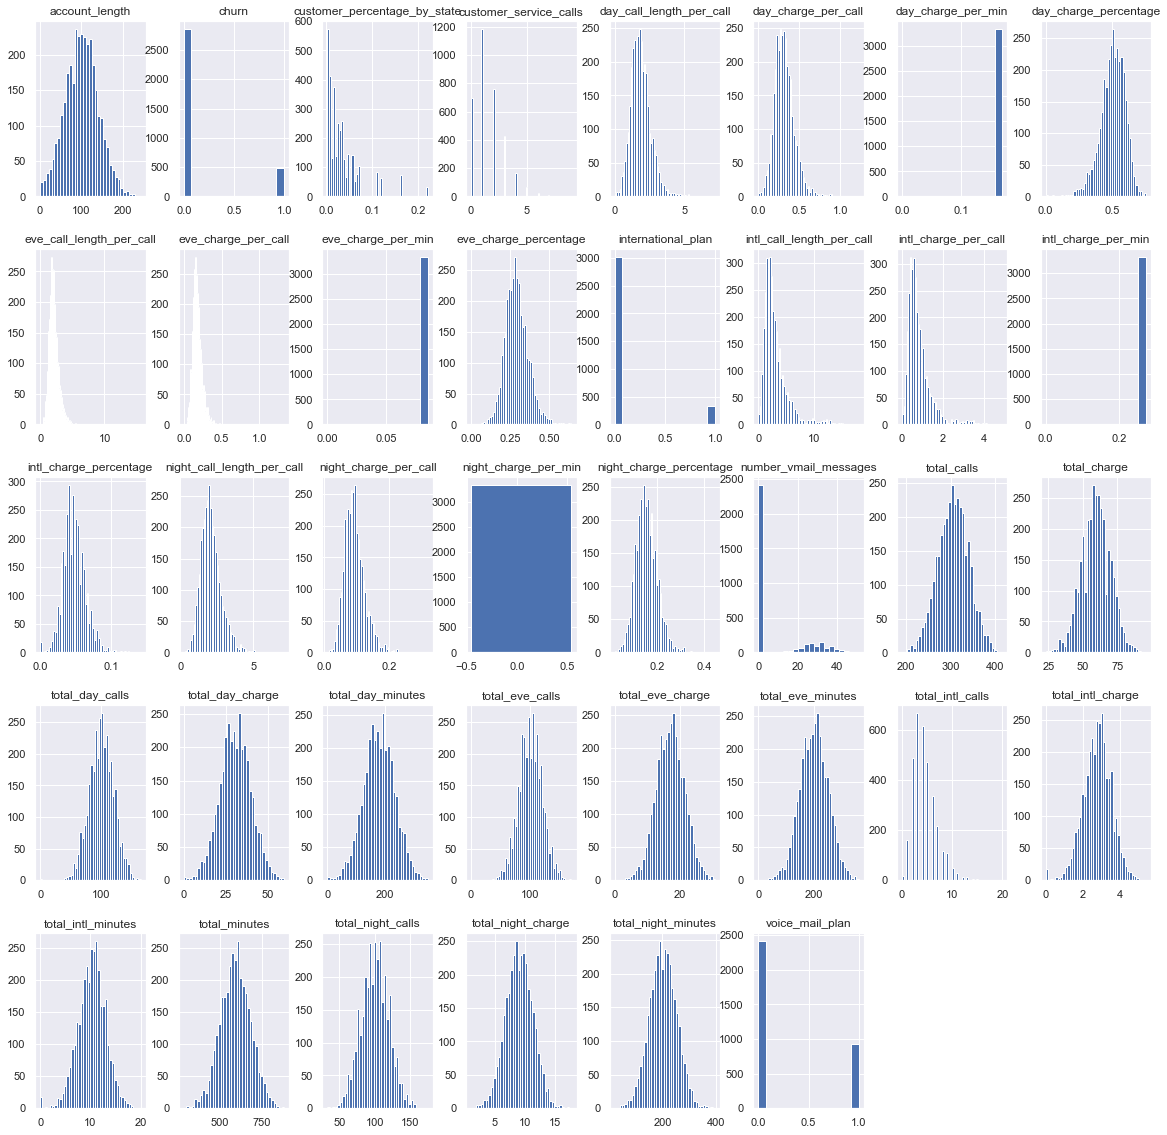

In [28]:
df.hist(bins='auto', layout=(5,8), figsize = (20,20));

__Let's save our new data set for Exploratory Data Analysis__

In [29]:
df.to_csv('/Users/ulku/Data Science 2.1 /Module_3/dsc-mod-3-project-v2-1-online-ds-sp-000-master/CSV_Files/customer_churn_data_cleaned.csv')